# Regression Trees & Random Forest Regression

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

C:\Workspacezhaw\data_analytics\Woche 8


## Import the apartment data

In [2]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'tax_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head(5)

(804, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income,dist_supermarket
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122,1,3180,26.07,47.255714,8.804976,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,317.117916
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87,0,1690,19.43,47.254879,8.793746,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,612.612674
2,1662023745-834,"8608 Bubikon, ZH",3.5,92,0,2350,25.54,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
3,1662023701-503,"8608 Bubikon, ZH",3.5,130,0,2500,19.23,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78,0,3760,48.21,47.361378,8.533339,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.73770,349.937421


## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[[                                                       'rooms',
                                                        'pop_dens',
                                                        'tax_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     rooms     pop_dens   tax_income  dist_supermarket
344    3.5  1662.597326  70118.99692        595.010106
350    3.5  1662.597326  70118.99692        157.537439
443    3.5  1327.635328  80595.52826        147.967057
331    3.5  1662.597326  70118.99692         52.959836
290    3.5  1662.597326  70118.99692         65.909235 

y_train:
344    1840
350    1570
443    1941
331    2480
290    2800
Name: price, dtype: int64


### Fit the regression tree model

In [4]:
# Create decision tree regressor object 
# Random state = Parametereinstellung (fixiert Random zahlen) 
# max_depth = wie tief ist der längste weg von der root zum letzten child-node
reg = DecisionTreeRegressor(random_state=20, max_depth=5)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [5]:
# Calculate coefficient of determination
print('R-squared:', r2_score(y_test, y_pred).round(4))

R-squared: 0.3549


#### Aufgabe c
The R-squared changed. The R-squared shows how well the data fit the regression model. That means an R-Squared above 0.7 would generally be seen as showing a high level of correlation, where as a measure below 0.4 would show a low correlation. In this case the R-squared changed from  0.4813 to 0.3549, which means it changed into a low correlation.

### Print text representation of the regression tree

In [6]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

# Falls Fläche kleiner wie 4269 und  falls Fläche kleiner als 69.5 dann gibt es eine prediction vom tee und die ist hier 1567

|--- pop_dens <= 3052.31
|   |--- rooms <= 4.25
|   |   |--- rooms <= 3.25
|   |   |   |--- rooms <= 1.25
|   |   |   |   |--- dist_supermarket <= 64.22
|   |   |   |   |   |--- value: [3200.00]
|   |   |   |   |--- dist_supermarket >  64.22
|   |   |   |   |   |--- value: [1369.25]
|   |   |   |--- rooms >  1.25
|   |   |   |   |--- tax_income <= 169461.49
|   |   |   |   |   |--- value: [1750.27]
|   |   |   |   |--- tax_income >  169461.49
|   |   |   |   |   |--- value: [2590.00]
|   |   |--- rooms >  3.25
|   |   |   |--- pop_dens <= 1436.78
|   |   |   |   |--- tax_income <= 80972.73
|   |   |   |   |   |--- value: [1903.44]
|   |   |   |   |--- tax_income >  80972.73
|   |   |   |   |   |--- value: [2061.16]
|   |   |   |--- pop_dens >  1436.78
|   |   |   |   |--- dist_supermarket <= 98.33
|   |   |   |   |   |--- value: [2446.60]
|   |   |   |   |--- dist_supermarket >  98.33
|   |   |   |   |   |--- value: [2126.62]
|   |--- rooms >  4.25
|   |   |--- tax_income <= 93898.52
|

### Vizualizing the regression tree

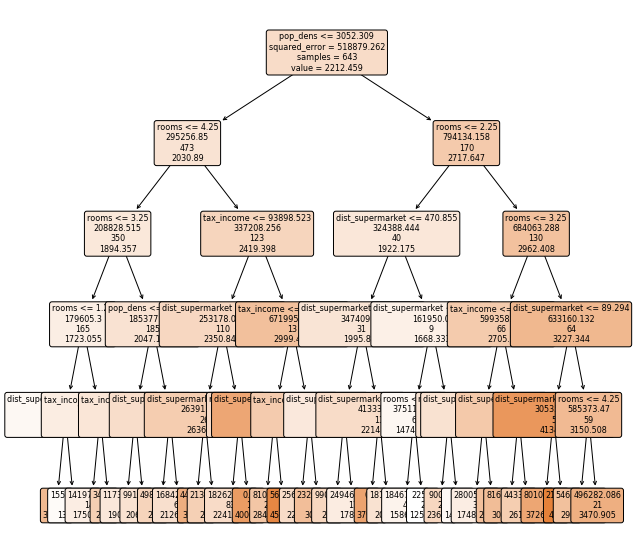

In [7]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=8,
                   label = 'root',
                   rounded=True)

#es wird immer die Frage gestellt, ob kleiner/gleich (wenn yes => dann nach links  , wenn no =>dann nach rechts)
# Datensatz wird dann auf einzelne Nodes geteilt
# Am schluss hat man auch noch mehrere Daten (Prediction kann man mit 132 Daten und vorhersagewert 1567 nachrechnen )
# Man könnte auch die minimale Anzahl von Nodes noch anders darstellen
# Output ist ein nummerischer Wert, da Regression-Tree

#### Aufgabe b
max_depth is a way to preprune a decision tree. In other words, if a tree is already as pure as possible at a depth, it will not continue to split. 
In this case we see, that the change of max_depth made more nodes in the tree.

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [8]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[[ 
                                                            'rooms',
                                                            'pop_dens',
                                                            'tax_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     rooms     pop_dens   tax_income  dist_supermarket
344    3.5  1662.597326  70118.99692        595.010106
350    3.5  1662.597326  70118.99692        157.537439
443    3.5  1327.635328  80595.52826        147.967057
331    3.5  1662.597326  70118.99692         52.959836
290    3.5  1662.597326  70118.99692         65.909235 

y2_train:
344    1840
350    1570
443    1941
331    2480
290    2800
Name: price, dtype: int64


### Fit the Random Forest Regression

In [9]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, #500 trees definiert
                               max_depth=10,    #tiefe sind 10 
                               random_state=5)  #fixiert random numbers
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', reg_rf.score(X2_test, y2_test).round(4))  #r-quadrat kann benutzt werden zum score berechnen

R-squared: 0.455


### Show feature(explanatory variables) importance

Index(['dist_supermarket', 'rooms', 'pop_dens', 'tax_income'], dtype='object')
[0.3426739  0.31917688 0.25684128 0.08130794]


<AxesSubplot: ylabel='features'>

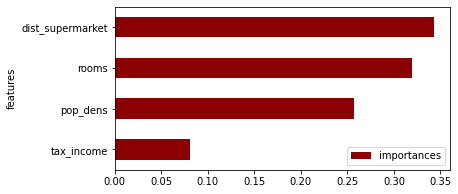

In [10]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

# Interpretation : Area ist die wichtigste Variable und populution density die zweitwichtigste (ist vlt auch von Multikollinearität abhängig)
# binary trees haben kein p-Wert und sind deshalb nicht von der Multikollinearität betroffen (nur bei linearer Regression der Fall)

#### Aufgabe f

The barchart looked like this before:
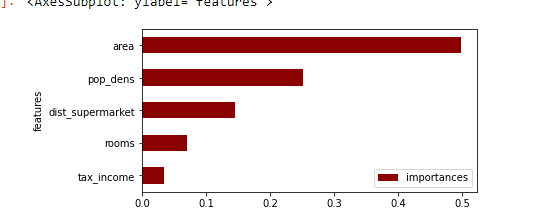

After that, the barchart looked like this:
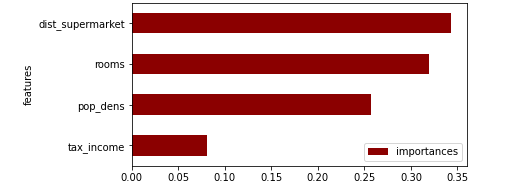

Like a correlation matrix, feature importance allows you to understand the relationship between the features and the target variable. It also helps you understand what features are irrelevant for the model.

This can be explained by multicollinearity. After removing the variable "area", which was previously considered the most important variable, they had to be sorted again according to their priority.  In this case, "dist_supermarket" seems to contain the most data which was before also in "area" and is now considered the most important variable.